# Support Vector Machines

In [210]:
using MLJ
import RDatasets: dataset
using Gadfly

In [2]:
X = randn(20, 2)
y = vcat(-ones(10), ones(10))

20-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [3]:
tX = MLJ.table(X) #Ensure X data is tabular
ty = categorical(y); #Change response data to corret type

In [40]:
Svc = @load LinearSVC pkg=LIBSVM verbosity=0

MLJLIBSVMInterface.LinearSVC

In [41]:
svc_mdl = Svc()

LinearSVC(
  solver = LIBSVM.Linearsolver.L2R_L2LOSS_SVC_DUAL, 
  tolerance = Inf, 
  cost = 1.0, 
  bias = -1.0)

LinearSVC seems to be broken via the LIBLINEAR PACKAGE, will not be further investigated for now.

## Non linear SVM

In [18]:
using MLJ
using Gadfly
using DataFrames

In [24]:
X = randn(200, 2)

for val in 1:100 X[val] = X[val] + 2 end
for val in 101:150 X[val] = X[val] -2 end

y = vcat(ones(150), 2*ones(50))

200-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0

In [25]:
tX = MLJ.table(X) #Ensure X data is tabular
ty = categorical(y); #Change response data to corret type

tX

Tables.MatrixTable{Matrix{Float64}} with 200 rows, 2 columns, and schema:
 :x1  Float64
 :x2  Float64

In [26]:
df = DataFrame(x1=X[:,1],x2=X[:,2],y=ty)

Row,x1,x2,y
,Float64,Float64,Cat…
1,1.84879,0.147581,1.0
2,3.74367,-1.49006,1.0
3,2.89318,0.607003,1.0
4,1.17818,0.409697,1.0
5,2.03855,-0.238684,1.0
6,2.24459,1.54066,1.0
7,0.336364,1.42575,1.0
8,2.78887,0.445362,1.0
9,2.18404,-0.422683,1.0


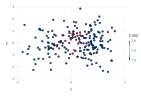

In [34]:
l1 = layer(x=X[:,1],y=X[:,2],Geom.point,color=y) #Color based on y value
plot(l1)

#Shows non linear seperation

In [35]:
train, test = partition(df,0.7,shuffle=true,rng=123)

(140×3 DataFrame
 Row │ x1         x2          y    
     │ Float64    Float64     Cat… 
─────┼─────────────────────────────
   1 │  2.18404   -0.422683   1.0
   2 │ -0.192164  -0.006276   2.0
   3 │ -1.69211   -0.500017   1.0
   4 │ -2.10703    0.0028513  1.0
   5 │  0.133999  -0.899105   2.0
   6 │ -0.109918  -0.951393   2.0
   7 │  1.96709   -0.194105   1.0
   8 │  0.388707  -0.679649   2.0
   9 │  1.84879    0.147581   1.0
  10 │  2.68729   -1.99989    1.0
  11 │  0.950263  -1.23534    1.0
  ⋮  │     ⋮          ⋮        ⋮
 131 │  1.36212    0.410679   2.0
 132 │  0.835257   0.640697   2.0
 133 │ -0.47365   -0.503418   2.0
 134 │  1.2109    -0.587517   1.0
 135 │ -2.87729    1.07187    1.0
 136 │  1.67758   -0.158761   1.0
 137 │  2.61006    2.21153    1.0
 138 │  3.77812    1.27523    1.0
 139 │  1.8274     0.0950213  2.0
 140 │ -2.41576   -0.386966   1.0
                   119 rows omitted, 60×3 DataFrame
 Row │ x1         x2         y    
     │ Float64    Float64    Cat… 
─────┼

In [39]:
y,X = unpack(train,==(:y))

(CategoricalArrays.CategoricalValue{Float64, UInt32}[1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0  …  2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0], 140×2 DataFrame
 Row │ x1         x2         
     │ Float64    Float64    
─────┼───────────────────────
   1 │  2.18404   -0.422683
   2 │ -0.192164  -0.006276
   3 │ -1.69211   -0.500017
   4 │ -2.10703    0.0028513
   5 │  0.133999  -0.899105
   6 │ -0.109918  -0.951393
   7 │  1.96709   -0.194105
   8 │  0.388707  -0.679649
   9 │  1.84879    0.147581
  10 │  2.68729   -1.99989
  11 │  0.950263  -1.23534
  ⋮  │     ⋮          ⋮
 131 │  1.36212    0.410679
 132 │  0.835257   0.640697
 133 │ -0.47365   -0.503418
 134 │  1.2109    -0.587517
 135 │ -2.87729    1.07187
 136 │  1.67758   -0.158761
 137 │  2.61006    2.21153
 138 │  3.77812    1.27523
 139 │  1.8274     0.0950213
 140 │ -2.41576   -0.386966
             119 rows omitted)

In [190]:
Svc = @load SVC pkg=LIBSVM verbosity=0

MLJLIBSVMInterface.SVC

Below is the default parameters for SVC

function SVC(
    ;kernel = LIBSVM.Kernel.RadialBasis
    ,gamma::Float64 = 0.0
    ,cost::Float64 = 1.0
    ,cachesize::Float64=200.0
    ,degree::Int32 = Int32(3)
    ,coef0::Float64 = 0.0
    ,tolerance::Float64 = .001
    ,shrinking::Bool = true
    ,probability::Bool = false)

In [38]:
svc_mdl = Svc(gamma=1.0)

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 1.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = false)

In [40]:
svcMach = machine(svc_mdl,X,y)

fit!(svcMach)

[ Info: Training machine(SVC(kernel = RadialBasis, …), …).


trained Machine; caches model-specific representations of data
  model: SVC(kernel = RadialBasis, …)
  args: 
    1:	Source @109 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @652 ⏎ AbstractVector{Multiclass{2}}


In [48]:
fitted_params(svcMach).libsvm_model

LIBSVM.SVM{UInt32, LIBSVM.Kernel.KERNEL}(LIBSVM.SVC, LIBSVM.Kernel.RadialBasis, nothing, 2, 140, 2, UInt32[0x00000001, 0x00000002], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{UInt32}, Matrix{Float64}}(83, Int32[49, 34], UInt32[0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001, 0x00000001  …  0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002, 0x00000002], [2.687292612670978 0.9502631735446887 … -0.47364987387771457 1.8274019005115136; -1.9998911636712298 -1.2353446376657498 … -0.5034180888037842 0.09502132135236983], Int32[10, 11, 13, 14, 20, 21, 22, 23, 25, 26  …  115, 116, 119, 121, 129, 130, 131, 132, 133, 139], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 2.687292612670978), LIBSVM.SVMNode(1, 0.9502631735446887), LIBSVM.SVMNode(1, 1.0766676099455532), LIBSVM.SVMNode(1, 0.5801322256637267), LIBSVM.SVMNode(1, 1.7479461906219484), LIBSVM.SVMNode(1, -0.210212567041442

In [42]:
report(svcMach)

(gamma = 1.0,)

In [50]:
yPred = predict(svcMach,X)

140-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}:
 1.0
 2.0
 1.0
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 ⋮
 1.0
 2.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

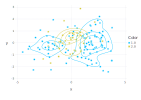

In [102]:
l2 = layer(x=X[:,1],y=X[:,2],Geom.point,color=y)

plot(x=X[:,1],y=X[:,2],layer(Geom.density2d(levels=3), color=yPred,
        linestyle=[:solid]),l2)



Increase cost of SVC

In [137]:
svc_mdl = Svc(gamma=2.0,cost = 1.0)

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 2.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = false)

In [138]:
svcMach = machine(svc_mdl,X,y)

fit!(svcMach)

[ Info: Training machine(SVC(kernel = RadialBasis, …), …).


trained Machine; caches model-specific representations of data
  model: SVC(kernel = RadialBasis, …)
  args: 
    1:	Source @061 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @280 ⏎ AbstractVector{Multiclass{2}}


In [139]:
yPred = predict(svcMach,X)

140-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}:
 1.0
 2.0
 1.0
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0
 2.0
 ⋮
 1.0
 2.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [140]:
misclassification_rate(yPred,y)

0.17142857142857143

In [142]:
evaluate!(svcMach, resampling=CV(nfolds=10),measure=misclassification_rate)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌─────────────────────────┬───────────┬─────────────┬─────────┬─────────────────
│ measure                 │ operation │ measurement │ 1.96*SE │ per_fold       ⋯
├─────────────────────────┼───────────┼─────────────┼─────────┼─────────────────
│ MisclassificationRate() │ predict   │ 0.257       │ 0.0502  │ [0.357, 0.286, ⋯
└─────────────────────────┴───────────┴─────────────┴─────────┴─────────────────
                                                                1 column omitted


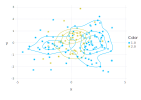

In [111]:
l2 = layer(x=X[:,1],y=X[:,2],Geom.point,color=y)

plot(x=X[:,1],y=X[:,2],layer(Geom.density2d(levels=3), color=yPred,
        linestyle=[:solid]),l2)

In [110]:
misclassification_rate(yPred,y)

0.02857142857142857

In [192]:
svc_mdl = Svc(probability=true)

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 0.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = true)

In [193]:
costRange = range(svc_mdl,:cost, lower=0.1, upper=1000)
gammaRange = range(svc_mdl,:gamma,lower=0.5,upper=4)

NumericRange(0.5 ≤ gamma ≤ 4.0; origin=2.25, unit=1.75)

In [194]:
svcT = TunedModel(model=svc_mdl,resampling=CV(nfolds=10),ranges=[costRange,gammaRange,],measure=misclassification_rate)

DeterministicTunedModel(
  model = SVC(
        kernel = LIBSVM.Kernel.RadialBasis, 
        gamma = 0.0, 
        cost = 1.0, 
        cachesize = 200.0, 
        degree = 3, 
        coef0 = 0.0, 
        tolerance = 0.001, 
        shrinking = true, 
        probability = true), 
  tuning = RandomSearch(
        bounded = Distributions.Uniform, 
        positive_unbounded = Distributions.Gamma, 
        other = Distributions.Normal, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 10, 
        shuffle = false, 
        rng = Random._GLOBAL_RNG()), 
  measure = MisclassificationRate(), 
  weights = nothing, 
  class_weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange(0.1 ≤ cost ≤ 1000.0; origin=500.05, unit=499.95), NumericRange(0.5 ≤ gamma ≤ 4.0; origin=2.25, unit=1.75)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n = nothing, 
  a

In [195]:
tunedMachine = machine(svcT,X,y)
fit!(tunedMachine)

[ Info: Training machine(DeterministicTunedModel(model = SVC(kernel = RadialBasis, …), …), …).
[ Info: Attempting to evaluate 10 models.
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:00


trained Machine; does not cache data
  model: DeterministicTunedModel(model = SVC(kernel = RadialBasis, …), …)
  args: 
    1:	Source @101 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @665 ⏎ AbstractVector{Multiclass{2}}


In [196]:
fitted_params(tunedMachine).best_model

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 3.204692632378566, 
  cost = 286.38906190647214, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = true)

In [197]:
report(tunedMachine).best_history_entry

(model = SVC(kernel = RadialBasis, …),
 measure = [MisclassificationRate()],
 measurement = [0.24500000000000002],
 per_fold = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.95, 1.0]],)

Using the entire data set with cross validation instead of an arbitraty test train split

In [198]:
y,X = unpack(df,==(:y))

(CategoricalArrays.CategoricalValue{Float64, UInt32}[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], 200×2 DataFrame
 Row │ x1         x2         
     │ Float64    Float64    
─────┼───────────────────────
   1 │  1.84879    0.147581
   2 │  3.74367   -1.49006
   3 │  2.89318    0.607003
   4 │  1.17818    0.409697
   5 │  2.03855   -0.238684
   6 │  2.24459    1.54066
   7 │  0.336364   1.42575
   8 │  2.78887    0.445362
   9 │  2.18404   -0.422683
  10 │  3.7577    -1.48545
  11 │  0.580132  -1.15484
  ⋮  │     ⋮          ⋮
 191 │  0.575473   0.593362
 192 │ -1.2991    -0.177051
 193 │  0.117045   0.788231
 194 │ -0.194945   0.953912
 195 │ -0.678547   1.8564
 196 │  0.835257   0.640697
 197 │  0.133999  -0.899105
 198 │ -1.13856    0.0821227
 199 │ -2.14623    0.933004
 200 │  0.53234    0.81297
             179 rows omitted)

In [200]:
svc_mdl = Svc(probability=true)

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 0.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = true)

In [201]:
costRange = range(svc_mdl,:cost, lower=0.1, upper=1000)
gammaRange = range(svc_mdl,:gamma,lower=0.5,upper=4)

NumericRange(0.5 ≤ gamma ≤ 4.0; origin=2.25, unit=1.75)

In [202]:
svcT = TunedModel(model=svc_mdl,resampling=CV(nfolds=10),ranges=[costRange,gammaRange,],measure=misclassification_rate)

DeterministicTunedModel(
  model = SVC(
        kernel = LIBSVM.Kernel.RadialBasis, 
        gamma = 0.0, 
        cost = 1.0, 
        cachesize = 200.0, 
        degree = 3, 
        coef0 = 0.0, 
        tolerance = 0.001, 
        shrinking = true, 
        probability = true), 
  tuning = RandomSearch(
        bounded = Distributions.Uniform, 
        positive_unbounded = Distributions.Gamma, 
        other = Distributions.Normal, 
        rng = Random._GLOBAL_RNG()), 
  resampling = CV(
        nfolds = 10, 
        shuffle = false, 
        rng = Random._GLOBAL_RNG()), 
  measure = MisclassificationRate(), 
  weights = nothing, 
  class_weights = nothing, 
  operation = nothing, 
  range = MLJBase.NumericRange{Float64, MLJBase.Bounded, Symbol}[NumericRange(0.1 ≤ cost ≤ 1000.0; origin=500.05, unit=499.95), NumericRange(0.5 ≤ gamma ≤ 4.0; origin=2.25, unit=1.75)], 
  selection_heuristic = MLJTuning.NaiveSelection(nothing), 
  train_best = true, 
  repeats = 1, 
  n = nothing, 
  a

In [203]:
tunedMachine = machine(svcT,X,y)
fit!(tunedMachine)

[ Info: Training machine(DeterministicTunedModel(model = SVC(kernel = RadialBasis, …), …), …).
[ Info: Attempting to evaluate 10 models.
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:01


trained Machine; does not cache data
  model: DeterministicTunedModel(model = SVC(kernel = RadialBasis, …), …)
  args: 
    1:	Source @840 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @162 ⏎ AbstractVector{Multiclass{2}}


In [204]:
fitted_params(tunedMachine).best_model

SVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 3.3439693256241014, 
  cost = 933.5473935158528, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true, 
  probability = true)

In [205]:
report(tunedMachine).best_history_entry

(model = SVC(kernel = RadialBasis, …),
 measure = [MisclassificationRate()],
 measurement = [0.24500000000000002],
 per_fold = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.95, 1.0]],)

In [206]:
yHat = predict(tunedMachine)

200-element CategoricalArrays.CategoricalArray{Float64,1,UInt32}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [207]:
L = levels(y)

2-element Vector{Float64}:
 1.0
 2.0

In [208]:
probs = pdf(yHat,L)

LoadError: MethodError: no method matching pdf(::CategoricalArrays.CategoricalVector{Float64, UInt32, Float64, CategoricalArrays.CategoricalValue{Float64, UInt32}, Union{}}, ::Vector{Float64})
[0mClosest candidates are:
[0m  pdf([91m::UnivariateFinite{S, V}[39m, ::V) where {S, V} at ~/.julia/packages/CategoricalDistributions/eSHdo/src/methods.jl:173
[0m  pdf([91m::KernelDensity.BivariateKDE[39m, ::Any, [91m::Any[39m) at ~/.julia/packages/KernelDensity/bNBAQ/src/interp.jl:32
[0m  pdf([91m::AbstractArray{UnivariateFinite{S, V, R, P}, N}[39m, ::AbstractVector{<:Union{CategoricalArrays.CategoricalValue{V, R}, V}}) where {S, V, R, P, N} at ~/.julia/packages/CategoricalDistributions/eSHdo/src/arrays.jl:100
[0m  ...

NuSVC type

In [182]:
Svc = @load OneClassSVM pkg=LIBSVM verbosity=0

MLJLIBSVMInterface.OneClassSVM

In [183]:
svc_mdl = Svc()

OneClassSVM(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 0.0, 
  nu = 0.1, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true)

In [184]:
mach = machine(svc_mdl,X,y)
fit!(mach)

[ Info: Training machine(OneClassSVM(kernel = RadialBasis, …), …).


trained Machine; caches model-specific representations of data
  model: OneClassSVM(kernel = RadialBasis, …)
  args: 
    1:	Source @404 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @613 ⏎ AbstractVector{Multiclass{2}}


In [211]:
prob = predict_proba(mach)

LoadError: UndefVarError: predict_proba not defined

In [187]:
yHat = MLJ.transform(mach)

200-element Vector{Float64}:
 -0.09604337493852899
 -0.00021167983805270296
 -0.21553778543882762
 -0.020296829938974525
 -0.15428603226965576
 -0.1376329471935409
 -0.056731711581464506
 -0.2169418152724618
 -0.2050087630024371
  0.01089979505705374
 -0.039615565373632755
 -0.09504037191960935
 -0.05023776149646064
  ⋮
 -0.01766572687445489
 -0.038075542937059836
 -0.01773545808198307
 -0.03571827632887725
 -0.045393410942486945
 -0.06971951541273125
  0.047259206125210174
 -0.021588733489294132
 -0.03880878473514349
 -0.030952276485447516
 -0.12963997511451675
 -0.03612702412249691

## ROC curve

Raw probability values are not currently available in the LIBSVM interface.

In [162]:
fprs, tprs,ts = roc_curve(yHat,y)

LoadError: MethodError: no method matching pdf(::CategoricalArrays.CategoricalValue{Float64, UInt32}, ::Float64)
[0mClosest candidates are:
[0m  pdf([91m::Distributions.Triweight{T}[39m, ::Real) where T<:Real at ~/.julia/packages/Distributions/gggmX/src/univariate/continuous/triweight.jl:45
[0m  pdf([91m::Distributions.Beta[39m, ::Real) at ~/.julia/packages/Distributions/gggmX/src/univariates.jl:634
[0m  pdf([91m::Distributions.Dirac[39m, ::Real) at ~/.julia/packages/Distributions/gggmX/src/univariate/discrete/dirac.jl:42
[0m  ...